In [6]:
import rdkit
from multiprocessing import freeze_support
from rdkit import Chem
from mordred import Calculator, descriptors
import pandas as pd
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from scipy.ndimage.filters import gaussian_filter


In [7]:
df1= pd.read_csv("compound_set1.csv")
df2 = pd.read_csv("compound_set2.csv")
df3 = pd.read_csv("compound_set3.csv")
assert list(df1.columns) == list(df2.columns) == list(df3.columns)

C:\Users\admin\AppData\Roaming\Python\Python37\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (5,6,7,8,9,10,11,12,13,14,15,16,143,152,161,170,179,188,197,206,215,224,233,234,235,236,237,238,239,240,241,242,342,343,344,345,346,347,348,349,350,359,368,377,386,395,404,413,422,431,440,449,450,451,452,453,454,455,456,457,465,473,481,489,497,505,513,521,529,537,545,546,547,548,549,550,551,552,553,561,569,577,585,593,601,609,617,625,633,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,816,817,907,908,909,91

In [8]:
df = pd.concat([df1, df2, df3], ignore_index=1)

#extract numerical data only
df = df.drop('Unnamed: 0', axis = 1)
df = df.drop('Lipinski', axis = 1)
df = df.drop('GhoseFilter', axis = 1)
df=df._get_numeric_data()
df = df.dropna(axis = 1)
df = df.dropna(axis = 0)


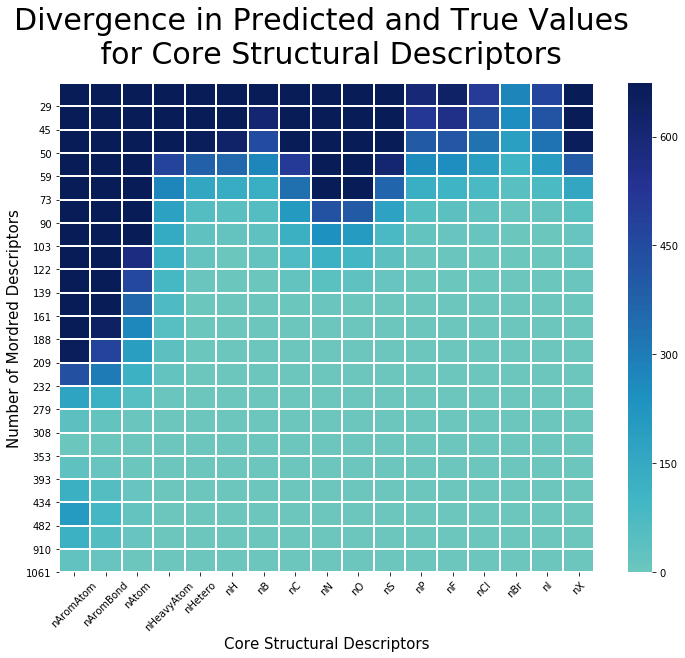

In [14]:
# read data
x_output = pd.read_csv("x_output.csv")
y_output = pd.read_csv("y_output.csv")
x_output = x_output.drop('Unnamed: 0', axis = 1)
x_output.columns = mordred_y.columns

#plot settings 
plt.figure( figsize = (12,9))
sns.heatmap(gaussian_filter(x_output, sigma = 1), vmax = (mordred_x.shape[0]/5), cmap = 'YlGnBu', center = 100, xticklabels =list(mordred_y.columns), yticklabels = y_output['0'], linewidths = 1)
plt.yticks(np.arange(1, 22),y_output['0'])
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.ylim(1,22)
plt.title("Divergence in Predicted and True Values \n for Core Structural Descriptors", size = 30, pad = 20)
plt.ylabel('Number of Mordred Descriptors', size = 15)
plt.xlabel('Core Structural Descriptors', size = 15)
plt.savefig('Visualization.png')